In [538]:
# Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


#### Change the current working directory to your desired folder for reading csv file

In [539]:
import os
#os.chdir("C:\\Users")
print('Current working directory is ----    '+ os.getcwd())
os.chdir("D:\\Relevel\\Week 13_Day3")
print('Changed working directory is ----    '+ os.getcwd())

Current working directory is ----    D:\Relevel\Week 13_Day3
Changed working directory is ----    D:\Relevel\Week 13_Day3


#### Reading the Olympics CSV data file which is used in this workbook

In [540]:
olympics = pd.read_csv("D:\\Relevel\\Week 13_Day3\\athlete_events.csv")
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [541]:
olympics.shape

(271116, 15)

We can see that the data has 271116 rows and 15 columns. The sample data can be seen using head() function

## Practice Question 1 

#### Make a Distplot of Height variable. 
* Make sure the warnings are supressed while the plot is shown. 
* Make sure NA's are not considered in the Distplot

### Solution : 

Warnings.filterwarnings("ignore") is used to suppress warning messages.

dropna function is used to drop NA values.

We can plot the required plot using sns.distplot()

In [542]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='Height', ylabel='Density'>

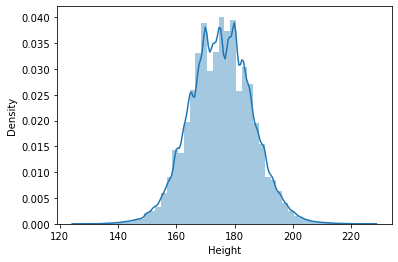

In [543]:
sns.distplot(olympics['Height'].dropna())

## Practice Question 2 

#### Make the same Displot as in Q1 for Weight variable. 


### Solution : 

<AxesSubplot:xlabel='Weight', ylabel='Density'>

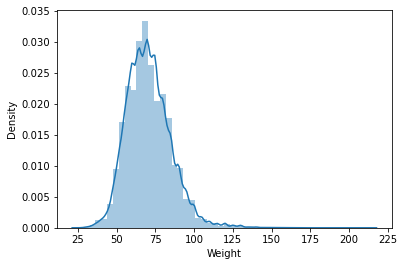

In [544]:
sns.distplot(olympics['Weight'].dropna())

## Practice Question 3 

#### As we can see that the default number of bins are not the best here - 
*  let's change the bins to 65 from Q2 plot. 
* the figure size should be 10,5
* Do not show the KDE plot 


### Solution : 

In [545]:
# Changing the figure size to 10,5

print("Earlier, figure default size was: ", plt.rcParams["figure.figsize"])
plt.rcParams["figure.figsize"] = (10, 5)
print("Now, figure default size is: ", plt.rcParams["figure.figsize"])

Earlier, figure default size was:  [6.0, 4.0]
Now, figure default size is:  [10.0, 5.0]


<AxesSubplot:xlabel='Weight'>

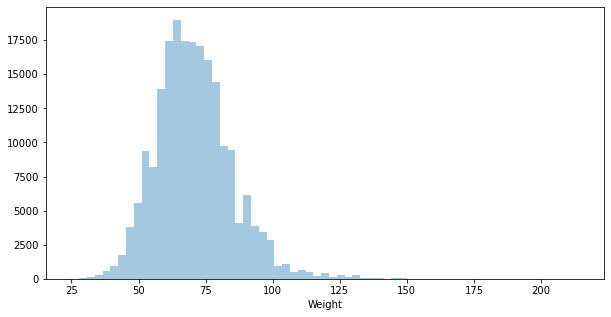

In [546]:
sns.distplot(olympics['Weight'].dropna(), bins=65, kde=False) # Specifying bins =65 as per requirement
                                                            # Specifying kde = false to hide the KDE

## Practice Question 4 

#### Show only the KDE plot for Q3 plot for Weight 


### Solution : 

<AxesSubplot:xlabel='Weight', ylabel='Density'>

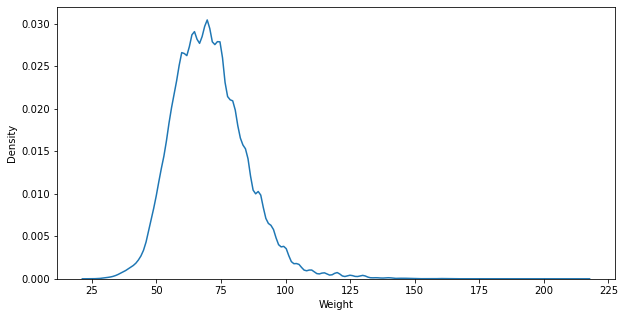

In [547]:
# this can be done by mentioning KDE = True and Hist=False

sns.distplot(olympics['Weight'].dropna(), hist=False, kde=True) 

## Practice Question 5 

#### Show only the Histogramt for Weight in Green color. Number of bins should be 65


### Solution : 

<AxesSubplot:xlabel='Weight'>

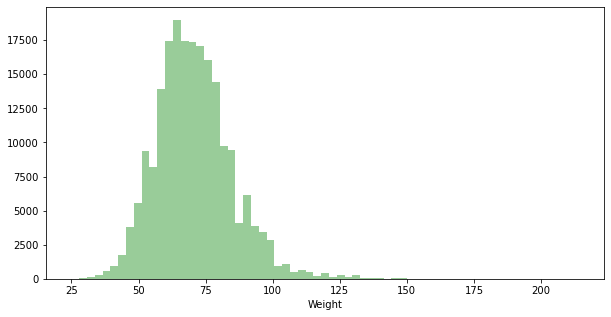

In [548]:
sns.distplot(olympics['Weight'].dropna(), bins=65, kde=False, color="g")

## Practice Question 6 

#### Show the KDE plot for Weight in Red color. The area under the KDE should be shaded. 


### Solution : 

<AxesSubplot:xlabel='Weight', ylabel='Density'>

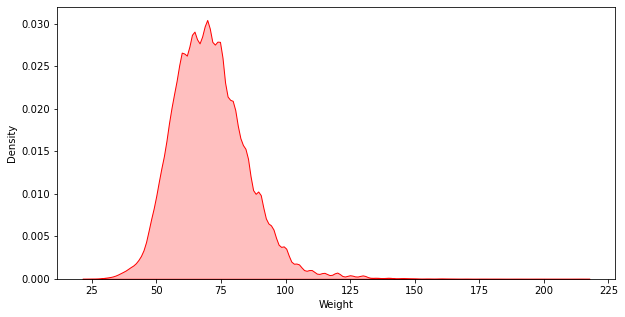

In [549]:
# This can be accomplished using shade = true
sns.kdeplot(olympics['Weight'].dropna(), shade=True, color="r")

## Practice Question 7

#### Show the KDE plots for both Height and Weight in a single figure. Use different colors for both plots. 


### Solution : 

<AxesSubplot:xlabel='Weight', ylabel='Density'>

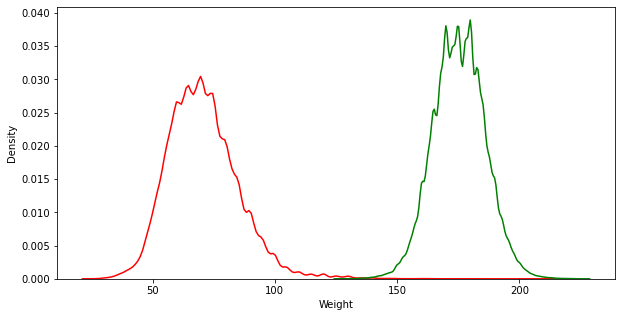

In [550]:
# Simply plot 2 KDEs and both will be plotted on the same chart
sns.kdeplot(olympics['Weight'].dropna(), color="r", label="Weight")
sns.kdeplot(olympics['Height'].dropna(), color="g", label="Height")

## Practice Question 8

#### Make a jointplot for Weight and Height 


### Solution : 

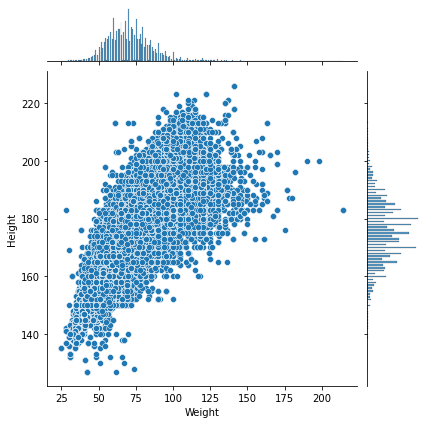

In [551]:
sns.jointplot(x="Weight", y="Height", data=olympics)

## Practice Question 9

#### Make a pairplot for the data


### Solution : 

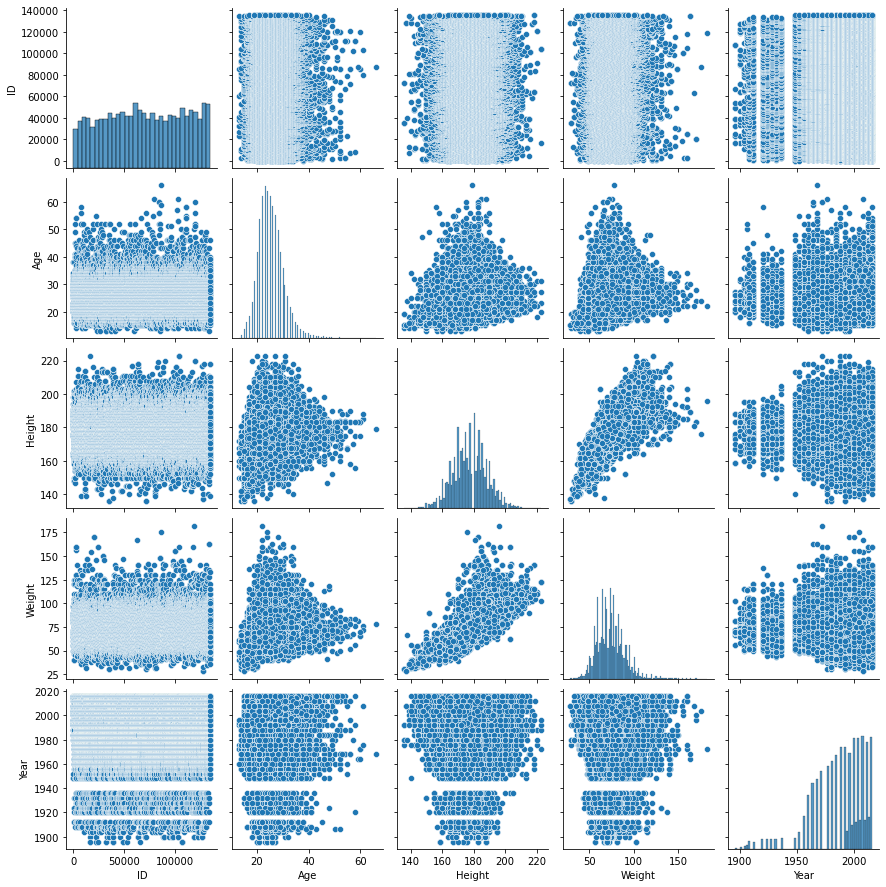

In [552]:
sns.pairplot(olympics.dropna())

## Practice Question 10

#### Make a Jointplot for Weight and Height, and change the X axis limits to (20,180) and Y axis limits to (135,205)


### Solution : 

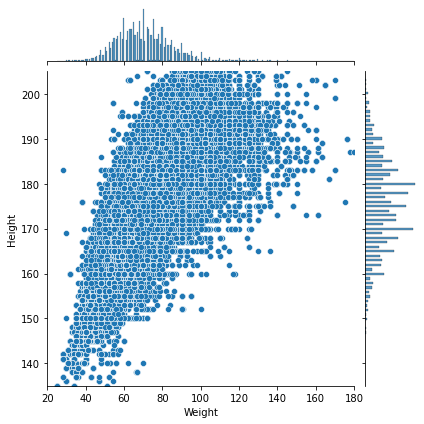

In [553]:
# This can be done using xlim and ylim parameters in jointplot function

sns.jointplot(x="Weight", y="Height", data=olympics, xlim=(20,180), ylim=(135,205))

## Practice Question 11

#### Make a pairplot for the data. The Medal type should be shown with Colors in the plot 


### Solution : 

Simply use hue='Medal' in the pairplot function

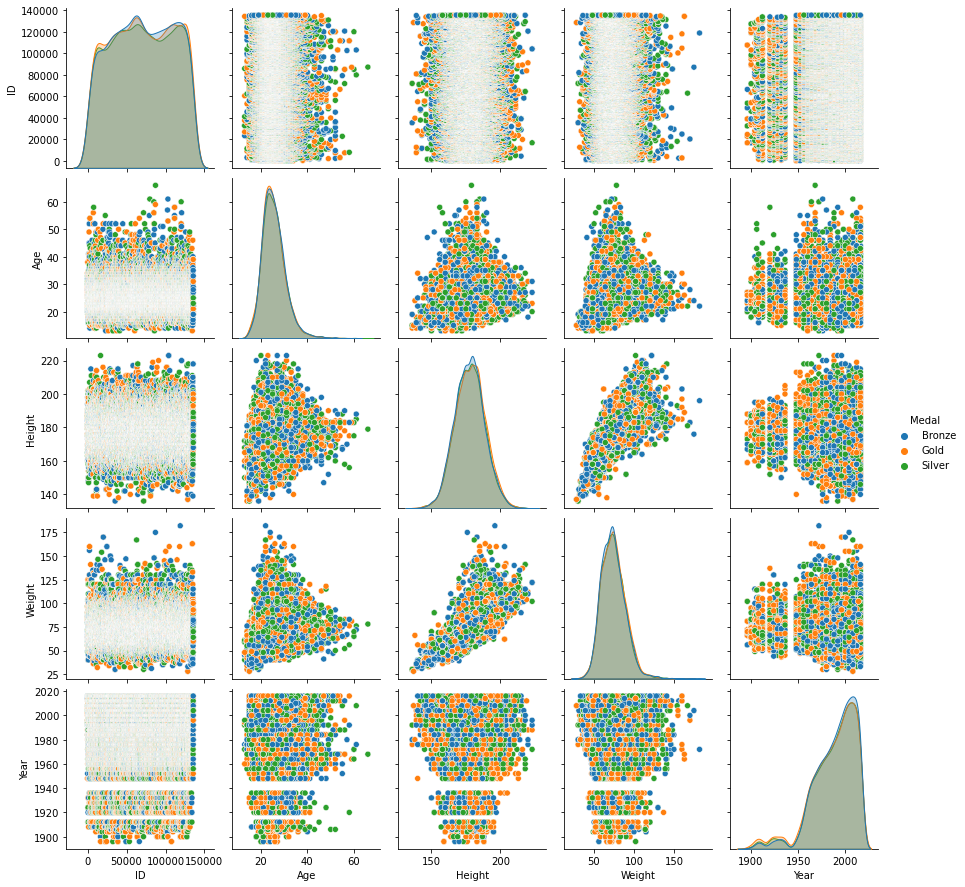

In [554]:
sns.pairplot(olympics.dropna(), hue="Medal")

## Practice Question 12

#### The ID and Year are not adding any value to Pairplot as these are categorical variales. Make a pariplot without these variables. 
#### The KDE should be shown on diagnol.


### Solution : 

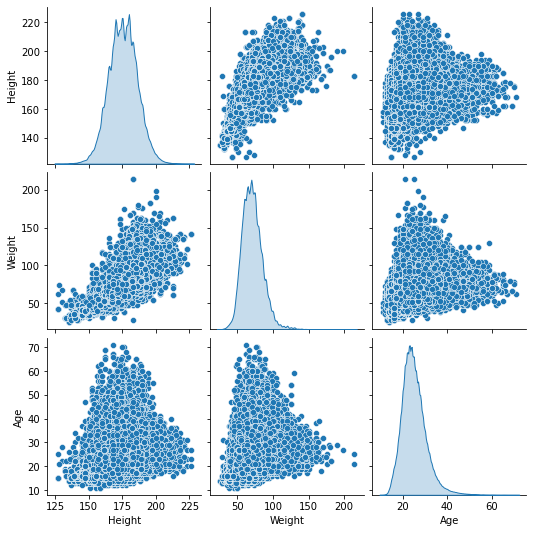

In [555]:
sns.pairplot(olympics[['Height', 'Weight', 'Age']].dropna(), diag_kind="kde")

## Practice Question 13

#### Make a Correlation heatmap for the data


### Solution : 

<AxesSubplot:>

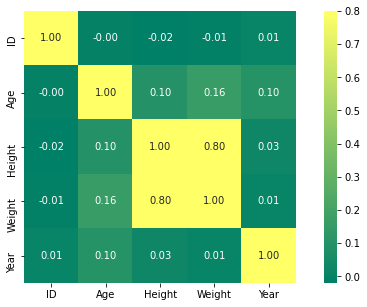

In [556]:
# Step 1 : Use Corrmat function to generate the Correlation matrix
# Step 2 : Use this matrix in sns.heatmap function to draw the heatmap

corrmat = olympics.dropna().corr()
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt=".2f", cmap="summer")

## Practice Question 14

#### Make the same heatmap as Q13, but without Year and ID variables


### Solution : 

First the columns are dropped using df.drop function.
Then the Heatmap is generated as in Q13

In [557]:
olympics_noidyear = olympics.drop(columns=['Year', 'ID'])

<AxesSubplot:>

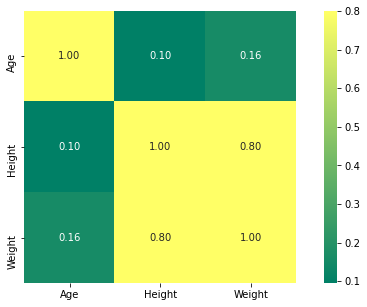

In [558]:
corrmat = olympics_noidyear.dropna().corr()
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt=".2f", cmap="summer")

## Practice Question 15

#### Show Top 20 countries by Medalists using a bar graph. The bar graph should list the Top 20 countries by descending order on X-Axis and Number of Medalists should be shown using bars.

( Please note that it is medalists count instead of medal counts. For e.g. Hockey gold medal will have multiple medalists as opposed to just 1 gold medal. For this reason, the count will be higher than the actual Medals counts)

* NOTE - In this entire notebook, we would refer to Medal counts = Medalists counts to avoid confusion.


### Solution : 

Step 1 : Create olympics_medals dataframe by grouping the data by Teams and counting number of medals in Medal column. 
        Sort the reult by Medal counts in descending order using sort_values and ascending = False.
        
Step 2 : Pick Top 20 countries by row selection [0:20]
    
Step 3 : Plot the barchart using sns.barplot. 
    
Step 4 : Give appropriate Chart title and rotate the X-axis ticks so that values don't overlap

In [559]:
olympics_medals= olympics[['Team','Medal']].groupby('Team', as_index=False).agg({"Medal": "count"}).sort_values("Medal",ascending=False)

In [560]:
olympics_medals_bar = olympics_medals[0:20]

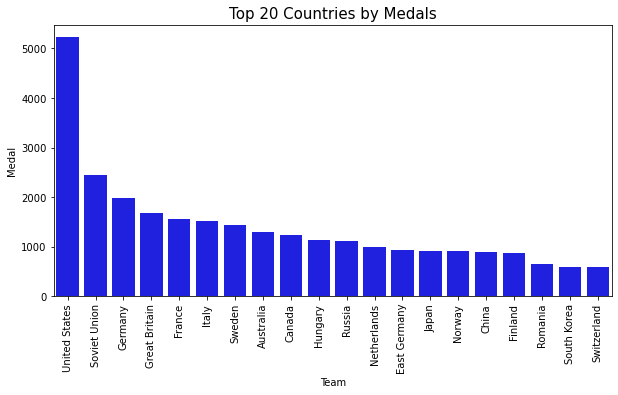

In [561]:
sns.barplot(x="Team",y="Medal",data=olympics_medals_bar, color= 'blue')
_=plt.xticks(rotation = 90 )
_=plt.title('Top 20 Countries by Medals', size = 15)

## Practice Question 16

#### Show Top 20 countries by Gold Medalists, Silver Medalists and Bronze Medalists in 3 seperate charts.

#### Charts should have following characteristics - 

* Top 20 Contries on X-Axis by Gold/Silver/Bronze Medalists
* The color of the bars should be as per the Medal ( Gold for Gold Medals etc.)
* Approprite chart title should be there for each chart
* Chart title size should be bigger than the Axis labels


### Solution : 

Step 1 : Filter 3 dataframes by Gld/Silver/Bronze medal rows
        
Step 2 : Manipulated those dataframes by counting the medals, sorting and selecting the top 20
    
Step 3 : Plot the barchart using sns.barplot. 
    
Step 4 : Give appropriate Chart title and rotate the X-axis ticks so that values don't overlap

In [562]:
olympics_bronze = olympics[(olympics['Medal']=='Bronze') ]           # Filtering dataset by Bronze medal rows
olympics_silver = olympics[(olympics['Medal']=='Silver') ]           # Filtering dataset by Silver medal rows
olympics_gold = olympics[(olympics['Medal']=='Gold') ]               # Filtering dataset by Gold medal rows


# Grouping the Filtered datasets for each Medal by Team, counting the Medals, Sorting by Medal counts and picking Top 20 

olympics_bronze_bar = olympics_bronze[['Team','Medal']].groupby('Team', as_index=False).agg({"Medal": "count"}).sort_values("Medal",ascending=False)[0:20]
olympics_silver_bar = olympics_silver[['Team','Medal']].groupby('Team', as_index=False).agg({"Medal": "count"}).sort_values("Medal",ascending=False)[0:20]
olympics_gold_bar = olympics_gold[['Team','Medal']].groupby('Team', as_index=False).agg({"Medal": "count"}).sort_values("Medal",ascending=False)[0:20]


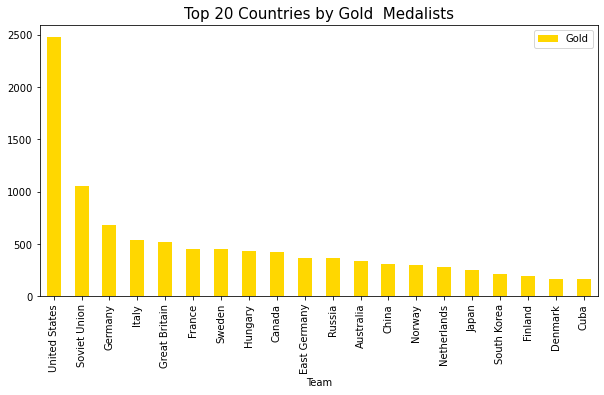

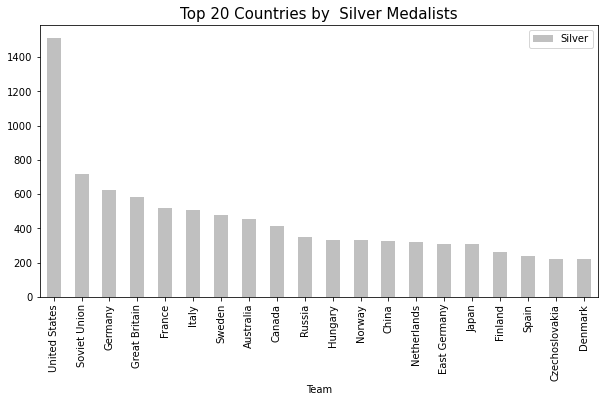

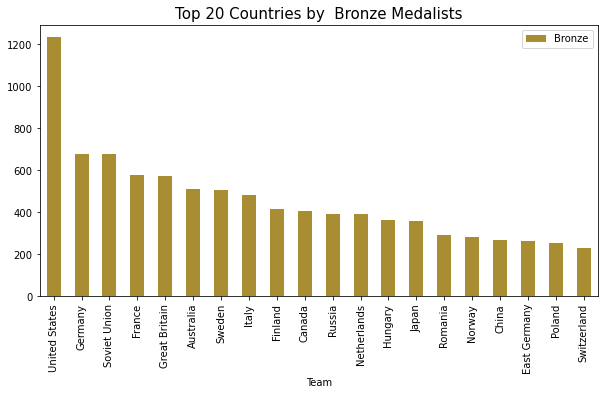

In [563]:
# Plotting the bar charts with appropriate title and colors

olympics_gold_bar.plot("Team","Medal",kind="bar", color= 'gold',label = 'Gold')
_=plt.title('Top 20 Countries by Gold  Medalists', size = 15)

olympics_silver_bar.plot("Team","Medal",kind="bar", color= 'silver',label = 'Silver')
_=plt.title('Top 20 Countries by  Silver Medalists', size = 15)

olympics_bronze_bar.plot("Team","Medal",kind="bar", color= '#a88d32',label = 'Bronze')
_=plt.title('Top 20 Countries by  Bronze Medalists', size = 15)

_=plt.xticks(rotation = 90 )
_=plt.legend()

## Practice Question 17

#### Make 1 stacked bar chart. 

#### Show Top 20 countries by Total  Medalists- But the bars will show stacked Gold, Silver  and Bronze Medalists for those countries

#### Charts should have following characteristics - 

* Top 20 Contries on X-Axis by Total Medalists
* The color of the stacked bars should be as per the Medal ( Gold for Gold Medals etc.)
* Approprite chart title should be used
* Chart title size should be bigger than the Axis labels


### Solution : 

Step 1 : Start with getting these 4 dataframes  - 
  * Get the list of top 20 teams from olympics_medals_bar in Q15
  * Filter a dataframe from main data for Silver medal rows, and where country is in top 20 teams ( Use list from point 1 )
  * Filter a dataframe from main data for Gold medal rows, and where country is in top 20 teams ( Use list from point 1 )
  * Filter a dataframe from main data for Bronze medal rows, and where country is in top 20 teams ( Use list from point 1 )
            
Step 2 : Manipulated the 3 medal dataframes by counting the medals and sorting alphabetically  based on Teams. The selection of top 20 countries here is not requires as in ealrier questions because we already have applied top20 filter in sbove steps.  
    
Step 3 : Start making a dataframe for the stacked bar chart. In order to have the final data ready we'll need 5 columns - 
  * List of Teams in a particular order - Get that by Teams column of any medal dataset above since all are sorted
  * Number of Gold medals in the same order of teams - Pick Medals from earlier created Gold dataframe in Step 2
  * Number of Silver medals in the same order of teams - Pick Medals from earlier created Silver dataframe in Step 2
  * Number of Bronze medals in the same order of teams - Pick Medals from earlier created Bronze dataframe in Step 2
  * Number of Total medals in the same order of teams - Pick Medals from earlier created Bronze dataframe in Q15
            
Step 4 : Sort the dataframe from Step 3 by Total column so that we have data in descending order of total medals for chart

Step 5 : Drop the Total columns as that is not need to be plotted. Only individually Gold/Silver/Bronze would do the job.

Step 6 : Give appropriate Chart title and rotate the X-axis ticks so that values don't overlap

In [564]:
# Step 1 , Getting list of top 20 team from Q15, and filtering Gold/Silver/Bronze medal data for those countries

top20 = olympics_medals_bar['Team']

olympics_bronze = olympics[(olympics['Medal']=='Bronze') & olympics['Team'].isin(top20)]
olympics_silver = olympics[(olympics['Medal']=='Silver') & olympics['Team'].isin(top20)]
olympics_gold = olympics[(olympics['Medal']=='Gold') & olympics['Team'].isin(top20)]



In [565]:
# Manipulating the data from last cell by counting medals and sorting based on teams

olympics_bronze20 = olympics_bronze[['Team','Medal']].groupby('Team', as_index=False).agg({"Medal": "count"}).sort_values("Team",ascending=False)
olympics_silver20 = olympics_silver[['Team','Medal']].groupby('Team', as_index=False).agg({"Medal": "count"}).sort_values("Team",ascending=False)
olympics_gold20 = olympics_gold[['Team','Medal']].groupby('Team', as_index=False).agg({"Medal": "count"}).sort_values("Team",ascending=False)


In [566]:
# Preparing data for the dataframe to be created for Stacked bar

team = olympics_silver20['Team']                       # Top 20 teams in alphabetic order
silver_20 = olympics_silver20['Medal']                 # Silver medals for top 20 teams in alphabetic order
gold_20 = olympics_gold20['Medal']                     # Gold medals for top 20 teams in alphabetic order
bronze_20 = olympics_bronze20['Medal']                 # Bronze medals for top 20 teams in alphabetic order

# Getting Total medals data from Q15. Sorting the same by Teams in alphabetical order so that everything is in same order
total_medals_data = olympics_medals_bar.groupby('Team', as_index = False).agg({"Medal": "sum"}).sort_values('Team',ascending=False)
total_medals = total_medals_data['Medal']



In [567]:
# Data for stacked bar prepared using data created in previous cell

stacked_df = pd.DataFrame({'Team': team,
                   'Gold': gold_20,
                   'Silver': silver_20,
                    'Bronze': bronze_20,
                    'Total': total_medals })

In [568]:
# Lets have a look at the final data. 
# It is evident that now we just need to sort it by Total medals and drop the Total column
stacked_df

,Team,Gold,Silver,Bronze,Total
19,United States,2474,1512,1233,5219
18,Switzerland,144,213,231,588
17,Sweden,451,476,507,1434
16,Soviet Union,1058,716,677,2451
15,South Korea,211,222,159,592
14,Russia,366,351,393,1110
13,Romania,161,200,290,651
12,Norway,299,330,281,910
11,Netherlands,277,321,390,988
10,Japan,247,307,357,911


In [569]:
# Sorting by total medals
stacked_df_sorted =stacked_df.sort_values('Total',ascending=False)

In [570]:
# Dropiing total column
stacked_df_sorted_final = stacked_df_sorted.drop('Total',axis=1)

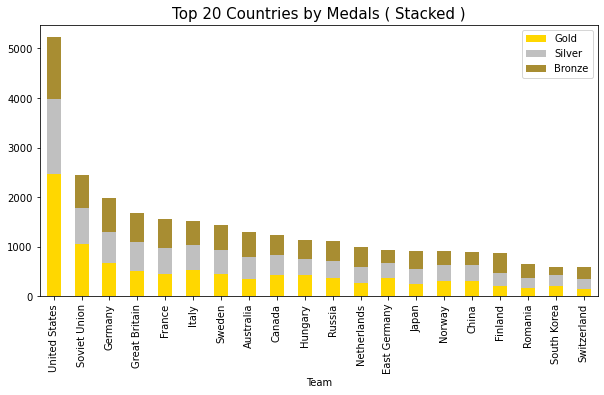

In [571]:
# Plotting Stacked bar chart 
stacked_df_sorted_final.set_index('Team').plot(kind='bar', stacked=True, color=['Gold', 'Silver','#a88d32'])

_=plt.title('Top 20 Countries by Medals ( Stacked )', size = 15)

_=plt.xticks(rotation = 90 )

## Practice Question 18

#### Draw a multiple line chart for Top 5 countries ( By total  medals) showing their *yearly Summer games* Medalists

* Years on X-Axis
* 5 lines, 1 for each country showing Summer Medalists counts for each year


### Solution : 

Step 1 : Get top 5 countries list from dataframe created in Q15
            
Step 2 : Filter the Main data by Summer season

Step 3 : Count the medals by Teams and sort the data by counts
            
Step 4 : Filter the data for top 5 countries

Step 5 : Plot a multiple line chart using sns.lineplot


In [572]:
top5 =olympics_medals_bar[0:5]['Team']
year_medals = olympics[olympics['Season']=='Summer']
year_medals_summer = year_medals[['Team','Year','Medal']].groupby(['Team','Year'], as_index=False).agg({"Medal": "count"}).sort_values("Medal",ascending=False)

In [573]:
year_medals_line = year_medals_summer[year_medals_summer['Team'].isin(top5)].sort_values(['Year'],ascending=False)

<AxesSubplot:xlabel='Year', ylabel='Medal'>

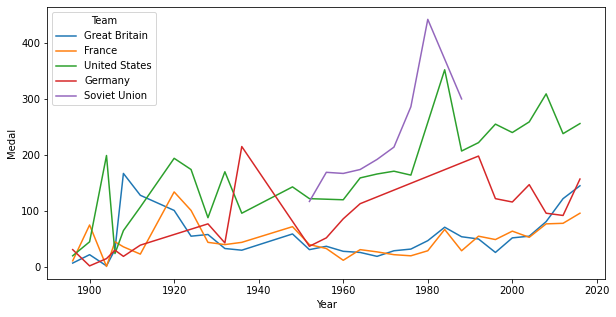

In [574]:
sns.lineplot(x='Year',y='Medal',hue='Team',data=year_medals_line)

## Practice Question 19

#### Draw a bar  chart showing India's total medalist counts over years. 

( Please note that it is medalists count instead of medal counts. For e.g. Hockey gold medal will have multiple medalists as opposed to just 1 gold medal. For this reason, the count will be higher than the Medals )

* Years on X-Axis
* Bars showing Medalists count 


### Solution : 

Step 1 : Sort main data for Team = India
            
Step 2 : Group by Year and count the medals

Step 3 : Use the data to create the desired plot usinf sns.barplot
            



In [575]:
olympics_india = olympics[olympics['Team']=="India"]
olympics_medals_india= olympics_india[['Team','Year','Medal']].groupby(['Team','Year'], as_index=False).agg({"Medal": "count"})

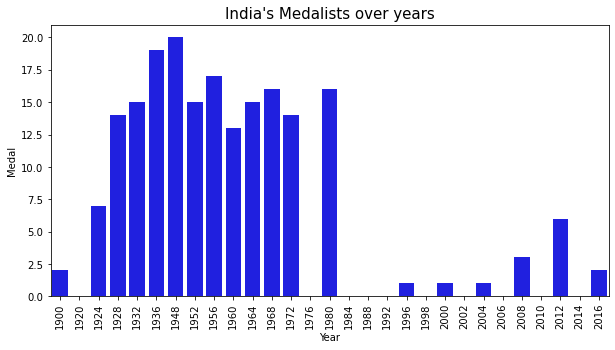

In [576]:
sns.barplot(x="Year",y="Medal",data=olympics_medals_india, color= 'blue')
_=plt.xticks(rotation = 90 )
_=plt.title("India's Medalists over years", size = 15)